In [47]:
import pymongo as pm
import gridfs
import cPickle
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

from scipy import misc
import os
import time
import json

import jupyter_utils as utils
reload(utils)

<module 'jupyter_utils' from 'jupyter_utils.pyc'>

In [72]:
data = np.load('/mnt/fs3/azhai/augmentation_cloud/ep50_train0.npz')
aug_emb = data['augmented_embeddings']
center_emb = data['center_crop_embeddings']
print aug_emb.shape, center_emb.shape

(1251, 2000, 128) (1251, 128)


In [51]:
valid_files = [
    '/mnt/fs3/azhai/augmentation_cloud/ep200_valid0.npz',
    '/mnt/fs3/azhai/augmentation_cloud/ep200_valid1.npz',
    '/mnt/fs3/azhai/augmentation_cloud/ep200_valid2.npz',
]
val_aug_emb = []
val_emb = []

for f in valid_files:
    data = np.load(f)
    val_aug_emb.append(data['augmented_embeddings'])
    val_emb.append(data['center_crop_embeddings'])
val_aug_emb = np.concatenate(val_aug_emb)
val_emb = np.concatenate(val_emb)
print val_aug_emb.shape, val_emb.shape

(1171, 2000, 128) (1171, 128)


In [50]:
epoch_num = 200
tr = utils.TfutilsReader('instance_task', 'control', 'full', port=27009, cache_dir='/mnt/fs1/azhai/checkpoints')
mb = utils.MemoryBank.load(tr, step_num=epoch_num*10009, gpu=2)

Restoring model from /mnt/fs1/azhai/checkpoints/instance_task/control/checkpoint-2001800
INFO:tensorflow:Restoring parameters from /mnt/fs1/azhai/checkpoints/instance_task/control/checkpoint-2001800


INFO:tensorflow:Restoring parameters from /mnt/fs1/azhai/checkpoints/instance_task/control/checkpoint-2001800


In [67]:
aug_pca = np.load('/mnt/fs3/azhai/augmentation_cloud/ep200_train0_pca.npy')
aug_pca_vecs = [x['principal_vecs'] for x in aug_pca]
aug_pca_vars = [x['variance_weights'] for x in aug_pca]

0.865377
0.88474


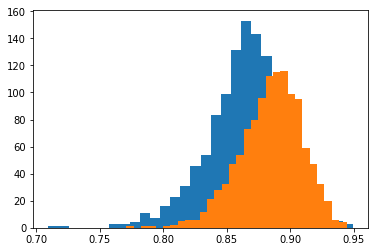

In [73]:
# Lengths of mean vectors of augmentation clouds

cloud_means = np.mean(aug_emb, axis=1)
plt.hist(np.linalg.norm(cloud_means, axis=1), bins=30)
print np.mean(np.linalg.norm(cloud_means, axis=1))

val_cloud_means = np.mean(val_aug_emb, axis=1)
plt.hist(np.linalg.norm(val_cloud_means, axis=1), bins=30)
print np.mean(np.linalg.norm(val_cloud_means, axis=1))

plt.show()

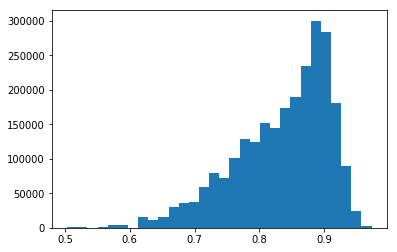

In [60]:
# Correlation between augmentation clouds and their corresponding center crop embedding

def emb_corr(idxs):
    all_corrs = []
    for idx in idxs:
        corrs = np.dot(aug_emb[ex_idx], center_emb[ex_idx].T)
        all_corrs.append(corrs)
    all_corrs = np.concatenate(all_corrs)
    plt.hist(all_corrs, bins=30)
    plt.show()
    
emb_corr(range(1251))

In [54]:
with open('/mnt/fs1/Dataset/TFRecord_Imagenet_standard/image_label_full_widx/validation_labels.json') as f:
    val_labels = json.loads(f.read())
    val_labels = np.array(val_labels)

def run_validation(idxs):
    true_labels = val_labels[idxs]
    labels = mb.classify(val_emb[idxs])
    
    def most_common(lst):
        return max(set(lst), key=lst.count)

    num_correct = 0
    k = 16
    for i, val_idx in enumerate(idxs):
        print 'Processing', i
        aug_labels = mb.classify(val_aug_emb[val_idx][:k])
        l = most_common(aug_labels)
        if l != labels[i]:
            print true_labels[i], labels[i], l
        if labels[i] == true_labels[i]:
            num_correct += 1
    
    print 'num correct:', num_correct, 'ratio:', (num_correct / float(len(idxs)))
    
run_validation(range(100))

Processing 0
Processing 1
650 745 826
Processing 2
519 464 519
Processing 3
Processing 4
497 755 483
Processing 5
178 933 263
Processing 6
Processing 7
Processing 8
Processing 9
Processing 10
Processing 11
220 246 184
Processing 12
727 803 705
Processing 13
544 949 544
Processing 14
Processing 15
Processing 16
Processing 17
Processing 18
Processing 19
536 780 536
Processing 20
714 714 968
Processing 21
Processing 22
415 860 394
Processing 23
Processing 24
257 204 257
Processing 25
Processing 26
896 719 684
Processing 27
Processing 28
Processing 29
Processing 30
Processing 31
138 912 319
Processing 32
Processing 33
Processing 34
Processing 35
Processing 36
Processing 37
235 235 249
Processing 38
527 508 620
Processing 39
758 26 815
Processing 40
Processing 41
Processing 42
106 224 275
Processing 43
Processing 44
Processing 45
Processing 46
Processing 47
973 327 393
Processing 48
Processing 49
776 642 862
Processing 50
132 131 132
Processing 51
Processing 52
Processing 53
Processing 54
P